In [1]:
from __future__ import division
from __future__ import absolute_import
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import numpy.fft
import scipy as sp
import seaborn as sns
from transmitters import transmitters
from source_alphabet import source_alphabet
from gnuradio import channels, gr, blocks
import matplotlib.pyplot as plt
from gnuradio import gr, blocks, digital, channels
np.random.seed(1338) # for reproducibility

len(interp_taps) = 287


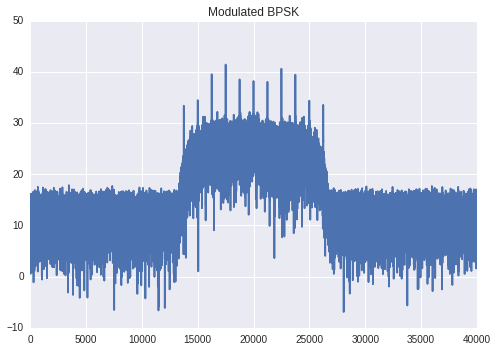

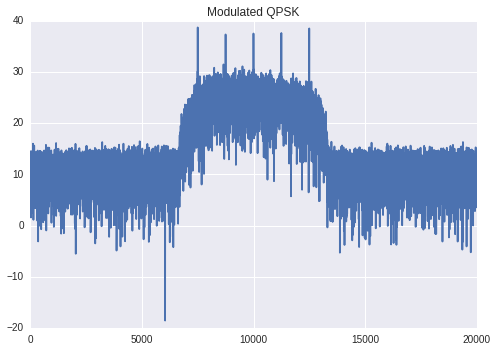

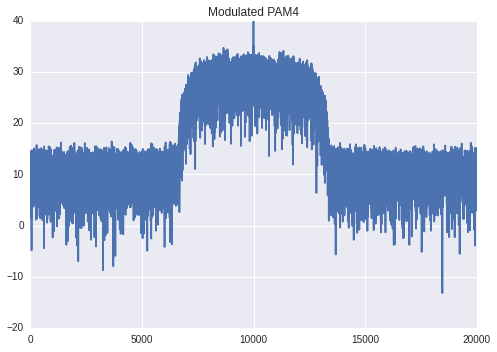

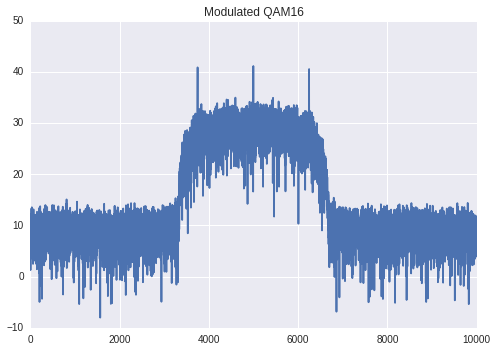

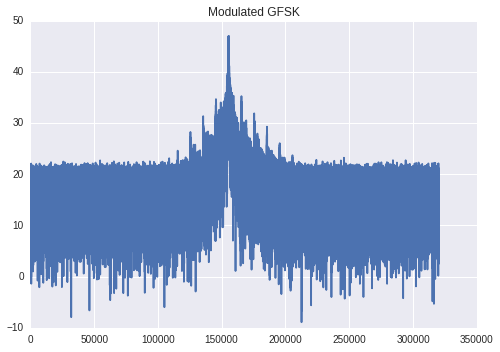

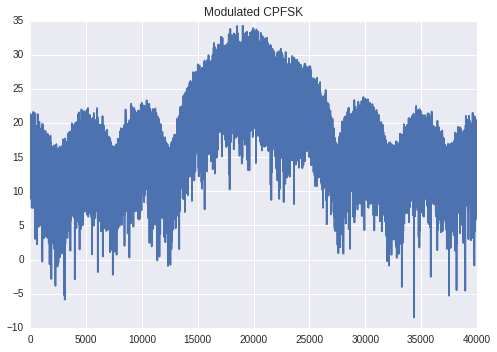

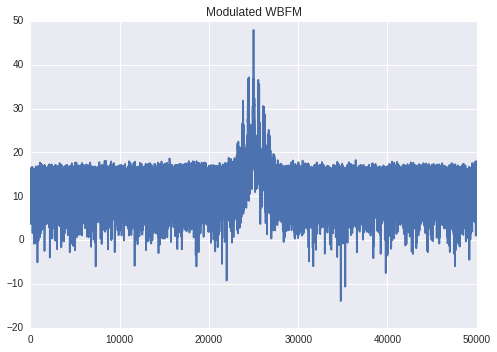

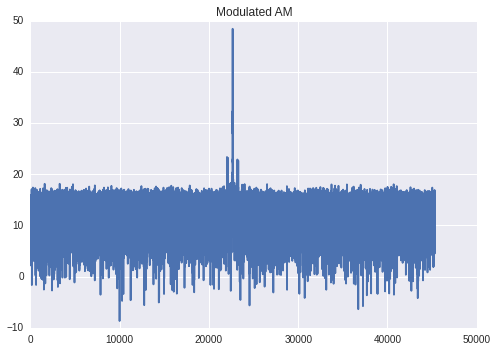

In [12]:
for alphabet_type in transmitters.keys():
    for i,mod_type in enumerate(transmitters[alphabet_type]):
        tx_len = int(10e3)
        src = source_alphabet(alphabet_type, tx_len)
        mod = mod_type()
        #chan = channels.selective_fading_model(8, 20.0/1e6, False, 4.0, 0, (0.0,0.1,1.3), (1,0.99,0.97), 8)
        chan = channels.dynamic_channel_model( 200e3, 0.01, 1e3, 0.01, 1e3, 
                                             8, 2.0, True, 4.0, [0.0, 0.1, 1.3], [1,0.99,0.97], 8, 0.1, 0x1337)
        snk = blocks.vector_sink_c()

        tb = gr.top_block()
        #tb.connect(src, mod, snk)
        tb.connect(src, mod, chan, snk)
        tb.run()

        plt.figure()
        plt.plot(10*np.log10(numpy.fft.fftshift(numpy.fft.fft(snk.data()))))
        #plt.plot(snk.data())
        plt.title("Modulated %s"%(mod_type.modname))